In [1]:
import numpy as np
import torch

In [2]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [20]:
def model(t_u, w, b):
    return w * t_u + b

In [21]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [6]:
w = torch.ones(())
b = torch.zeros(())
t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [7]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8846)

In [9]:
delta = 0.1
loss_rate_of_change_w = (loss_fn(model(t_u, w+delta, b), t_c) - loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

In [10]:
learning_rate = 1e-2

In [11]:
w = w - learning_rate * loss_rate_of_change_w

In [12]:
loss_rate_of_change_b = (loss_fn(model(t_u, w, b + delta), t_c) - loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)

In [13]:
b = b - learning_rate * loss_rate_of_change_b

In [22]:
def dloss_fn(t_p, t_c):
    return 2 * (t_p - t_c) / t_p.size(0)

In [19]:
def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

In [23]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [24]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params
        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)
        
        params = params - learning_rate * grad
        
        print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [31]:
training_loop(n_epochs=5000, learning_rate = 1e-2, params = torch.tensor([1.0, 0.0]), t_u = 0.1*t_u, t_c = t_c)

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574917
Epoch 3, Loss 30.871077
Epoch 4, Loss 29.756193
Epoch 5, Loss 29.507149
Epoch 6, Loss 29.392458
Epoch 7, Loss 29.298828
Epoch 8, Loss 29.208717
Epoch 9, Loss 29.119417
Epoch 10, Loss 29.030487
Epoch 11, Loss 28.941875
Epoch 12, Loss 28.853565
Epoch 13, Loss 28.765556
Epoch 14, Loss 28.677851
Epoch 15, Loss 28.590431
Epoch 16, Loss 28.503321
Epoch 17, Loss 28.416496
Epoch 18, Loss 28.329975
Epoch 19, Loss 28.243738
Epoch 20, Loss 28.157801
Epoch 21, Loss 28.072151
Epoch 22, Loss 27.986799
Epoch 23, Loss 27.901731
Epoch 24, Loss 27.816954
Epoch 25, Loss 27.732460
Epoch 26, Loss 27.648256
Epoch 27, Loss 27.564342
Epoch 28, Loss 27.480711
Epoch 29, Loss 27.397358
Epoch 30, Loss 27.314295
Epoch 31, Loss 27.231512
Epoch 32, Loss 27.149006
Epoch 33, Loss 27.066790
Epoch 34, Loss 26.984844
Epoch 35, Loss 26.903173
Epoch 36, Loss 26.821791
Epoch 37, Loss 26.740675
Epoch 38, Loss 26.659838
Epoch 39, Loss 26.579279
Epoch 40, Loss 26.498987
Epoch 41,

Epoch 1445, Loss 3.126031
Epoch 1446, Loss 3.125356
Epoch 1447, Loss 3.124683
Epoch 1448, Loss 3.124017
Epoch 1449, Loss 3.123348
Epoch 1450, Loss 3.122685
Epoch 1451, Loss 3.122022
Epoch 1452, Loss 3.121362
Epoch 1453, Loss 3.120706
Epoch 1454, Loss 3.120049
Epoch 1455, Loss 3.119396
Epoch 1456, Loss 3.118746
Epoch 1457, Loss 3.118098
Epoch 1458, Loss 3.117452
Epoch 1459, Loss 3.116805
Epoch 1460, Loss 3.116164
Epoch 1461, Loss 3.115525
Epoch 1462, Loss 3.114886
Epoch 1463, Loss 3.114250
Epoch 1464, Loss 3.113617
Epoch 1465, Loss 3.112984
Epoch 1466, Loss 3.112357
Epoch 1467, Loss 3.111731
Epoch 1468, Loss 3.111103
Epoch 1469, Loss 3.110484
Epoch 1470, Loss 3.109860
Epoch 1471, Loss 3.109242
Epoch 1472, Loss 3.108627
Epoch 1473, Loss 3.108011
Epoch 1474, Loss 3.107401
Epoch 1475, Loss 3.106791
Epoch 1476, Loss 3.106180
Epoch 1477, Loss 3.105575
Epoch 1478, Loss 3.104972
Epoch 1479, Loss 3.104370
Epoch 1480, Loss 3.103770
Epoch 1481, Loss 3.103172
Epoch 1482, Loss 3.102576
Epoch 1483, 

Epoch 2914, Loss 2.928989
Epoch 2915, Loss 2.928985
Epoch 2916, Loss 2.928980
Epoch 2917, Loss 2.928976
Epoch 2918, Loss 2.928971
Epoch 2919, Loss 2.928967
Epoch 2920, Loss 2.928962
Epoch 2921, Loss 2.928958
Epoch 2922, Loss 2.928953
Epoch 2923, Loss 2.928947
Epoch 2924, Loss 2.928944
Epoch 2925, Loss 2.928941
Epoch 2926, Loss 2.928935
Epoch 2927, Loss 2.928932
Epoch 2928, Loss 2.928926
Epoch 2929, Loss 2.928924
Epoch 2930, Loss 2.928918
Epoch 2931, Loss 2.928913
Epoch 2932, Loss 2.928909
Epoch 2933, Loss 2.928904
Epoch 2934, Loss 2.928902
Epoch 2935, Loss 2.928897
Epoch 2936, Loss 2.928893
Epoch 2937, Loss 2.928887
Epoch 2938, Loss 2.928883
Epoch 2939, Loss 2.928880
Epoch 2940, Loss 2.928877
Epoch 2941, Loss 2.928871
Epoch 2942, Loss 2.928867
Epoch 2943, Loss 2.928864
Epoch 2944, Loss 2.928860
Epoch 2945, Loss 2.928855
Epoch 2946, Loss 2.928850
Epoch 2947, Loss 2.928845
Epoch 2948, Loss 2.928843
Epoch 2949, Loss 2.928838
Epoch 2950, Loss 2.928833
Epoch 2951, Loss 2.928830
Epoch 2952, 

Epoch 4402, Loss 2.927654
Epoch 4403, Loss 2.927655
Epoch 4404, Loss 2.927655
Epoch 4405, Loss 2.927656
Epoch 4406, Loss 2.927655
Epoch 4407, Loss 2.927655
Epoch 4408, Loss 2.927654
Epoch 4409, Loss 2.927653
Epoch 4410, Loss 2.927655
Epoch 4411, Loss 2.927654
Epoch 4412, Loss 2.927654
Epoch 4413, Loss 2.927655
Epoch 4414, Loss 2.927655
Epoch 4415, Loss 2.927653
Epoch 4416, Loss 2.927654
Epoch 4417, Loss 2.927654
Epoch 4418, Loss 2.927654
Epoch 4419, Loss 2.927654
Epoch 4420, Loss 2.927655
Epoch 4421, Loss 2.927654
Epoch 4422, Loss 2.927653
Epoch 4423, Loss 2.927655
Epoch 4424, Loss 2.927653
Epoch 4425, Loss 2.927654
Epoch 4426, Loss 2.927655
Epoch 4427, Loss 2.927654
Epoch 4428, Loss 2.927654
Epoch 4429, Loss 2.927653
Epoch 4430, Loss 2.927654
Epoch 4431, Loss 2.927652
Epoch 4432, Loss 2.927654
Epoch 4433, Loss 2.927655
Epoch 4434, Loss 2.927654
Epoch 4435, Loss 2.927655
Epoch 4436, Loss 2.927652
Epoch 4437, Loss 2.927653
Epoch 4438, Loss 2.927654
Epoch 4439, Loss 2.927654
Epoch 4440, 

tensor([  5.3671, -17.3012])

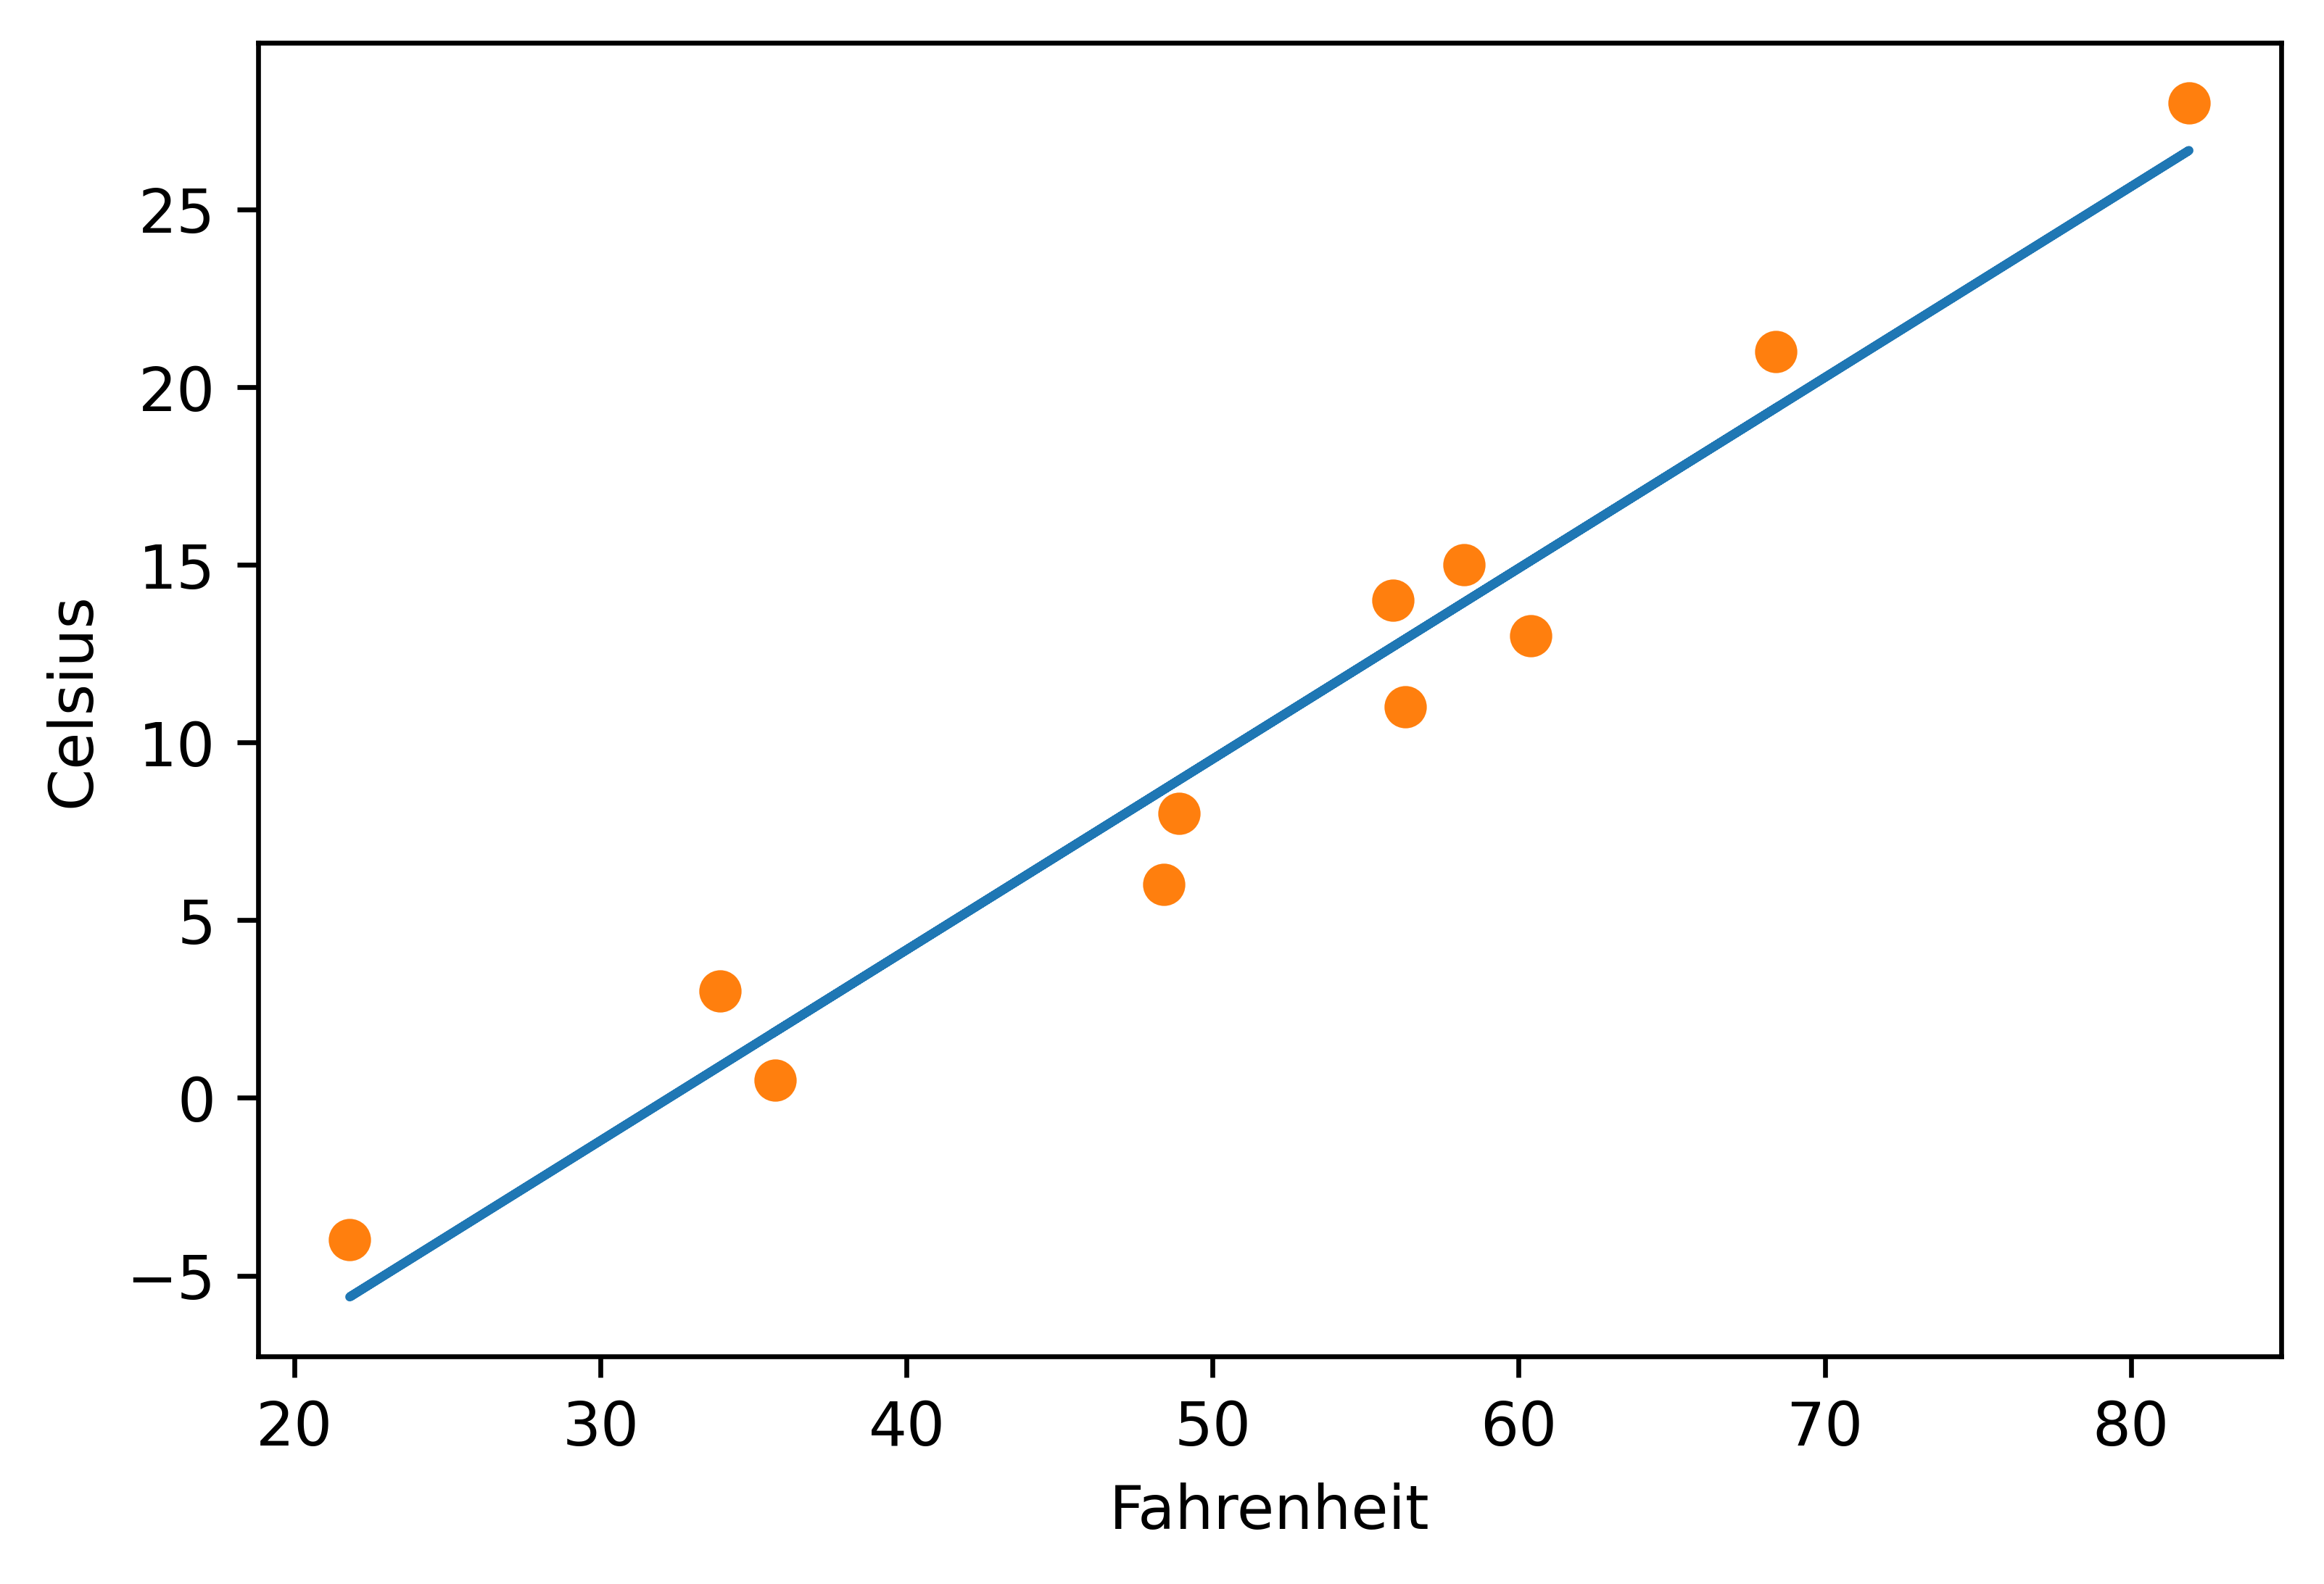

In [33]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(0.1 * t_u, *[  5.3671, -17.3012])

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')